ODEs with parameters
==================

The values of numerical constants in heyoka.py can either be specified when constructing an ODE system, or they can be loaded at a later stage when the ODE system is being integrated. The latter type of numerical constant is known as a *parameter*.

Let's start by importing heyoka.py and NumPy:

In [1]:
import heyoka as hy
import numpy as np

For this example, we will be integrating the pendulum ODE:

$$
   \begin{cases}
   x^\prime = v \\
   v^\prime = -g \sin x
   \end{cases},
$$

where $g$ is the value of the gravitational acceleration ($9.8\,\mathrm{m}/\mathrm{s}^2$ on Earth). Let's first create the symbolic state variables $x$ and $v$, which represent respectively the pendulum's angle and its time derivative:

In [2]:
x, v = hy.make_vars("x", "v")

Because we don't want to fix $g$ to a specific numerical value, when writing down the ODE system we will be implementing $g$ as a parameter:

In [3]:
ode_sys = [(x, v),
           (v, -hy.par[0] * hy.sin(x))]

The syntax ``par[0]`` means that the actual value of $g$ will be the first value (index 0) loaded from the parameter array when integrating the ODE system.

Let's now create the integrator object, using as initial conditions $\left( \pi/2, 0\right)$:

In [4]:
ta = hy.taylor_adaptive(ode_sys,
                       [np.pi/2, 0])

print(ta)

Taylor order: 20
Dimension   : 2
Time        : 0.0000000000000000
State       : [1.5707963267948966, 0.0000000000000000]
Parameters  : [0.0000000000000000]



As you can see from the screen output ``Parameters = ...``, heyoka detected that ``ode_sys`` contains one parameter, and set its value to zero. We can change the value of the parameter by directly accessing the parameters array:

In [5]:
ta.pars[0] = 9.8

print(ta)

Taylor order: 20
Dimension   : 2
Time        : 0.0000000000000000
State       : [1.5707963267948966, 0.0000000000000000]
Parameters  : [9.8000000000000007]



Note that it is also possible to directly set the value of the parameters on construction via the ``pars`` keyword argument:

In [6]:
ta = hy.taylor_adaptive(ode_sys,
                       [np.pi/2, 0],
                       pars=[9.8])

print(ta)

Taylor order: 20
Dimension   : 2
Time        : 0.0000000000000000
State       : [1.5707963267948966, 0.0000000000000000]
Parameters  : [9.8000000000000007]



Let's now integrate the ODE system for a few time units:

In [7]:
t_grid = np.linspace(0,10,1000)
e_hist = [(ta.propagate_until(_), ta.state[0])[1] for _ in t_grid]

Let's now move to Mars, where the gravitational acceleration on the surface is $3.71\,\mathrm{m}/\mathrm{s}^2$ (instead of good ole Earth's $9.8\,\mathrm{m}/\mathrm{s}^2$):

In [8]:
# Reset time and state.
ta.time = 0
ta.state[:] = [np.pi/2, 0]

# Change gravity.
ta.pars[0] = 3.71

# Integrate again.
m_hist = [(ta.propagate_until(_), ta.state[0])[1] for _ in t_grid]

Finally, let's plot the evolution of $x$ in time to show how a pendulum swings more slowly on Mars:

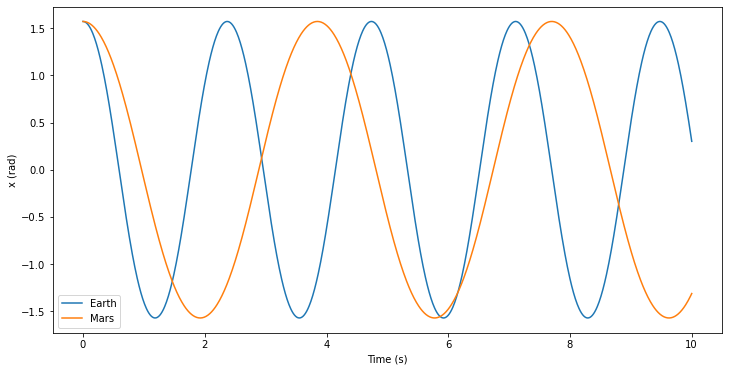

In [9]:
from matplotlib.pylab import plt
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(t_grid, e_hist, label="Earth")
plt.plot(t_grid, m_hist, label="Mars")
plt.xlabel("Time (s)")
plt.ylabel("x (rad)")
plt.legend();